In [10]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rajes\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Encoding  the data

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

df['Gender'] = le.fit_transform(df['Gender'])
df.drop(columns= 'CustomerID', inplace= True)
df.head()
X = df
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Standalization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

# Elbow  method


 Elbow  Values : [800.0000000000001, 588.8026767824938, 476.78755441351586, 388.7654342841472, 331.26499941323004, 295.62045497375004, 240.6501468454177, 210.2344360566876, 195.21890785961142, 158.97426901501024]


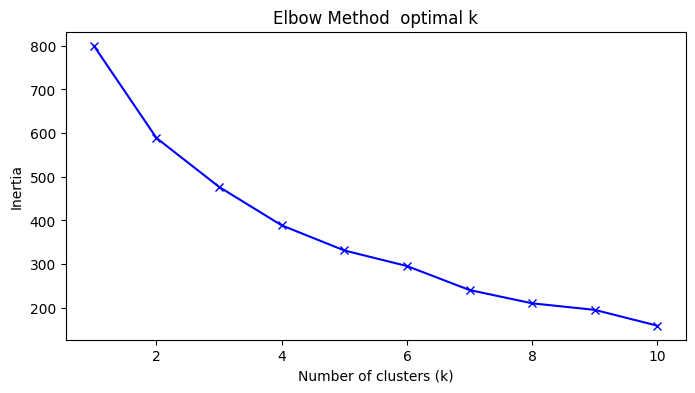

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

print(f"\n Elbow  Values : {inertia}")

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method  optimal k')
plt.show()

# Dimentionality Reductions  - TSNE

In [14]:
from sklearn.manifold import TSNE


tsne  = TSNE(n_components = 3, perplexity = 30, n_iter = 1000 , random_state = 42 )

X_tsne = tsne.fit_transform(X_scaled)

X_tsne[:5]


c:\Users\rajes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


array([[-4.4988327, -3.1021109,  3.0935802],
       [-5.299927 , -3.353121 ,  1.745719 ],
       [ 6.5566545,  1.3572651, -5.1768155],
       [ 4.2261386,  4.9313736, -5.467811 ],
       [ 5.346389 ,  1.8267235, -5.3479314]], dtype=float32)

# AgglomerativeClustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

cluster_labels = clustering.fit_predict(X_tsne)
    

In [16]:
print(cluster_labels[:5])  

[0 0 2 1 2]


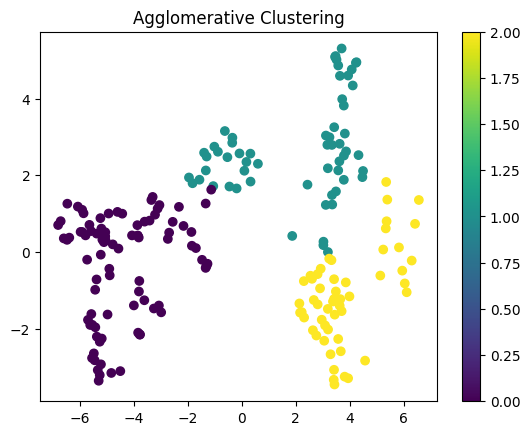

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar()
plt.title('Agglomerative Clustering')
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

silhouette= silhouette_score(X_tsne, cluster_labels)

print(f'Silhouette Score: {silhouette}')


Silhouette Score: 0.48011425137519836
